#### **Exercise1**

Repeat the curve fitting example with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend

[1.41533803 0.27849613]


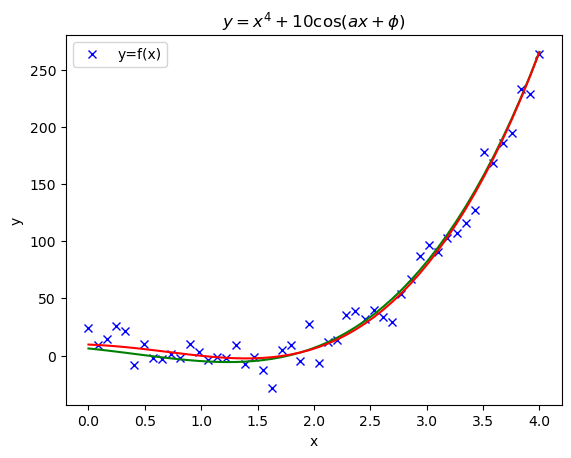

In [58]:
from scipy import optimize

np.random.seed(0)

# Let's generate fake data that we can "fit" then 
def f(x, a, phi):
    return x**4 + 10*np.cos(a * x + phi)

#random makes it look like experimental data
x = np.linspace(0, 4, 50)
y = f(x, 1.3, 0.9) + 10*np.random.normal(size=50)

np.savetxt("datas.txt", np.column_stack((x, y)), delimiter=",", header="x, y")
data = np.loadtxt("datas.txt", delimiter=",", skiprows=1)
x_loaded, y_loaded = data[:, 0], data[:, 1]

# Now fit the model: the parameters omega and phi can be found in the
# `params` vector
params, params_cov = optimize.curve_fit(f, x_loaded, y_loaded)

print(params)

fig, ax = plt.subplots()

# plot the data and the fitted curve
ax.plot(x_loaded, y_loaded,'bx', label='y=f(x)')
ax.plot(x_loaded,f(x_loaded,1.3,0.9),'g-')
ax.plot(x_loaded, f(x_loaded, *params), 'r-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$y=x^{4}+10\cos(ax+\phi)$')
ax.legend()


#### **Exercise2**

Generate a 3 by 3 matrix. Find it's inverse, determinant, eigen values and eigen vectors both by using numpy and scipy functions.

In [1]:
import numpy as np
from scipy.linalg import eig, inv

# Generate a 3x3 matrix
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Find the inverse of the matrix using Numpy
inv_matrix = np.linalg.inv(matrix)
print("Inverse of matrix using Numpy: \n", inv_matrix)

# Find the determinant of the matrix using Numpy
det_matrix = np.linalg.det(matrix)
print("Determinant of matrix using Numpy: ", det_matrix)

# Find the eigenvalues and eigenvectors of the matrix using Scipy
eig_vals, eig_vecs = eig(matrix)
print("Eigenvalues of matrix using Scipy: \n", eig_vals)
print("Eigenvectors of matrix using Scipy: \n", eig_vecs)


Inverse of matrix using Numpy: 
 [[-4.50359963e+15  9.00719925e+15 -4.50359963e+15]
 [ 9.00719925e+15 -1.80143985e+16  9.00719925e+15]
 [-4.50359963e+15  9.00719925e+15 -4.50359963e+15]]
Determinant of matrix using Numpy:  6.66133814775094e-16
Eigenvalues of matrix using Scipy: 
 [ 1.61168440e+01+0.j -1.11684397e+00+0.j -4.22209278e-16+0.j]
Eigenvectors of matrix using Scipy: 
 [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


#### **Exercise3**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.

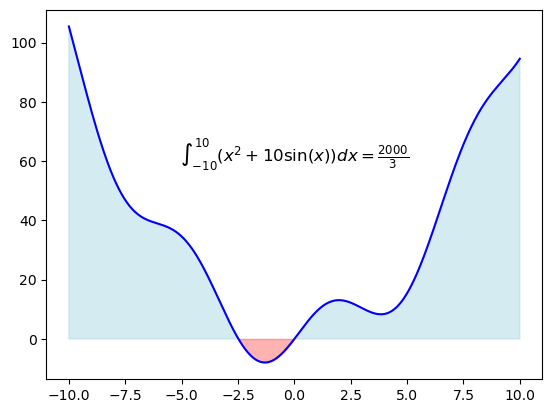

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

x = np.linspace(-10, 10, num=500)
y = x**2 + 10*np.sin(x)

fig, ax = plt.subplots()
ax.fill_between(x, y, 0, where=(y > 0), color='lightblue', alpha=0.5)
ax.fill_between(x, y, 0, where=(y < 0), color='red', alpha=0.3)
ax.plot(x, y, '-b')

x = sym.Symbol('x')
y = x**2 + 10*sym.sin(x)

integral = sym.integrate(y, (x, -10, 10))
integral

integral_text = r"$\int_{-10}^{10} (x^2 + 10\sin(x)) dx = %s$"%(sym.latex(integral))
plt.text(0, 60, integral_text, fontsize=12, ha='center')
plt.show()

#### **Exercise4**

With the help of documentation find 3 different ways to interpolate data produced from the function 
`np.cos(-x**2/9.0)`. 

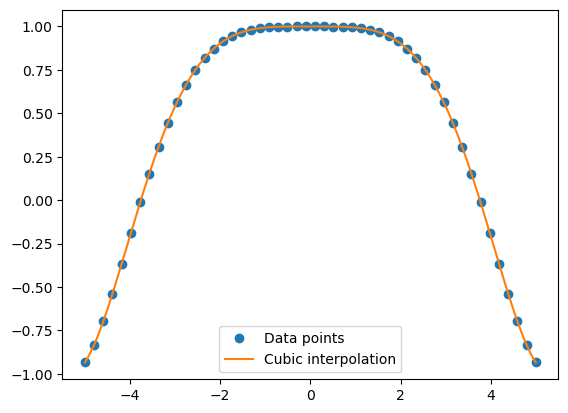

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.linspace(-5, 5, num=50)
y = np.cos(-x**2/9.0)

f = interp1d(x, y, kind='cubic')

x_interp = np.linspace(-5, 5, num=500)
y_interp = f(x_interp)

plt.plot(x, y, 'o', label='Data points')
plt.plot(x_interp, y_interp, '-', label='Cubic interpolation')
plt.legend()
plt.show()

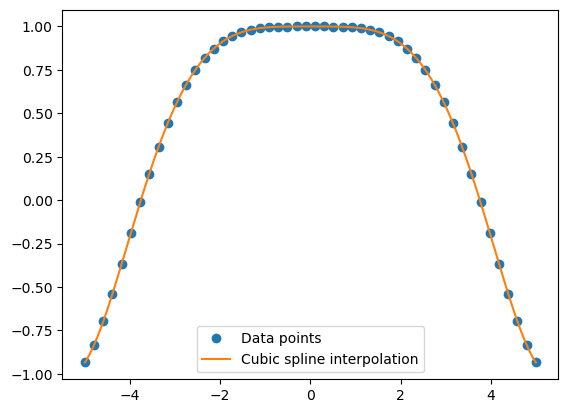

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

x = np.linspace(-5, 5, num=50)
y = np.cos(-x**2/9.0)

spline = splrep(x, y)

x_interp = np.linspace(-5, 5, num=500)
y_interp = splev(x_interp, spline)

plt.plot(x, y, 'o', label='Data points')
plt.plot(x_interp, y_interp, '-', label='Cubic spline interpolation')
plt.legend()
plt.show()


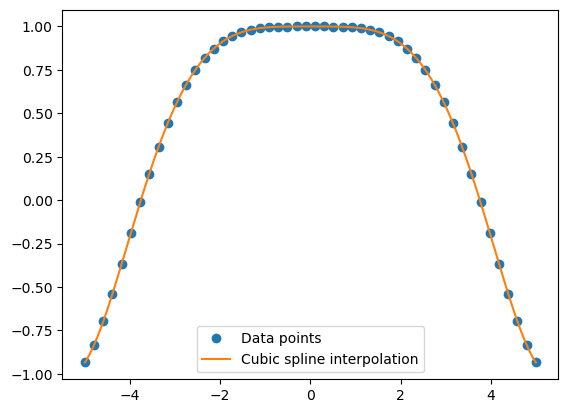

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.linspace(-5, 5, num=50)
y = np.cos(-x**2/9.0)

spline = CubicSpline(x, y)

x_interp = np.linspace(-5, 5, num=500)
y_interp = spline(x_interp)

plt.plot(x, y, 'o', label='Data points')
plt.plot(x_interp, y_interp, '-', label='Cubic spline interpolation')
plt.legend()
plt.show()


#### **Exercise5**